<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/CIFAR_10_dataset_saving_loading_model_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the CIFAR-10 image dataset

In [2]:
import tensorflow as tf

cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

170500096/170498071 [==============================] - 8s 0us/step


In [5]:
print('x train shape: {}'.format(x_train.shape))
print('y train shape: {}'.format(y_train.shape))
print('x test shape: {}'.format(x_test.shape))
print('y test shape: {}'.format(y_test.shape))

x train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
x test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the [CIFAR homepage](https://www.cs.toronto.edu/%7Ekriz/cifar.html).



In [6]:
labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

###Let's use a smaller subset of dataset to speed up the things

In [8]:
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [9]:
print('x train shape: {}'.format(x_train.shape))
print('y train shape: {}'.format(y_train.shape))
print('x test shape: {}'.format(x_test.shape))
print('y test shape: {}'.format(y_test.shape))

x train shape: (10000, 32, 32, 3)
y train shape: (10000, 1)
x test shape: (1000, 32, 32, 3)
y test shape: (1000, 1)


###Let's plot some of images

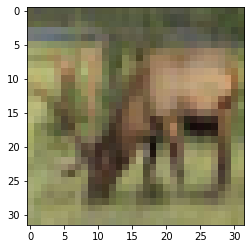


 this is an image of deer


In [56]:
import matplotlib.pyplot as plt
import numpy as np

inx = np.random.choice(x_train.shape[0])

img_x = x_train[inx]
img_y = y_train[inx]
plt.figure(figsize=(4,4))
plt.imshow(img_x)
plt.show()
print('\n this is an image of {}'.format(labels[img_y[0]]))

Let's plot 10 of these images in a row

['truck', 'frog', 'truck', 'dog', 'bird', 'automobile', 'dog', 'bird', 'horse', 'bird']


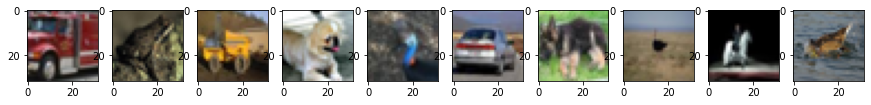

In [50]:
fig, ax = plt.subplots(1, 10, figsize=(15, 15))
img_labels=[]

for i in range(10):
  inx = np.random.choice(x_train.shape[0])
  img = x_train[inx]
  ax[i].imshow(img)
  img_labels.append(labels[y_train[inx][0]])
  #ax[i].set_axis_off()
print(img_labels)

# Build a sequential convolutional neural network for image classification


In [65]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

def get_model():
  model = Sequential([Conv2D(filters=16, kernel_size=(3,3),
                             input_shape=(32, 32, 3), activation='relu',
                             name='Conv2D_1'),
                      Conv2D(filters=8, kernel_size=(3,3), activation='relu',
                             name='Conv2D_2'),
                      MaxPooling2D(pool_size=(4,4), name='MaxPooling2D_1'),
                      Flatten(name='flatten'),
                      Dense(32, activation='relu', name='Dense_1'),
                      Dense(10, activation='softmax', name='Dense_2')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
  return model



In [69]:
model = get_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
MaxPooling2D_1 (MaxPooling2D (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
Dense_2 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
__________________________________________________

## Let's also define a helper function to evaluate the model on test images

In [73]:
def get_test_accuracy(model, x_test, y_test):
  test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=False)
  print('test accuracy: {}'.format(test_acc))

In [74]:
get_test_accuracy(model, x_test, y_test)

test accuracy: 0.11500000208616257


# Train the model with Checkpoints

In [77]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = 'model_checkpoints/checkpoint'

In [78]:
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_freq='epoch',
                             save_weights_only=True,
                             verbose=1)

In [81]:
model.fit(x_train, y_train, epochs=3, callbacks=[checkpoint])

Epoch 1/3
313/313 [==============================] - 12s 36ms/step - loss: 1.9499 - accuracy: 0.2925

Epoch 00001: saving model to model_checkpoints/checkpoint
Epoch 2/3
313/313 [==============================] - 10s 33ms/step - loss: 1.6294 - accuracy: 0.4092

Epoch 00002: saving model to model_checkpoints/checkpoint
Epoch 3/3
313/313 [==============================] - 10s 33ms/step - loss: 1.5111 - accuracy: 0.4510

Epoch 00003: saving model to model_checkpoints/checkpoint


So it saved the model in the directory `model_checkpoints` to a file called `checkpoint` and does this to every epoch. So at the end of every epoch, we overwrite the same checkpoint file. 

In [82]:
! ls -lh

total 8.0K
drwxr-xr-x 2 root root 4.0K Feb 23 18:55 model_checkpoints
drwxr-xr-x 1 root root 4.0K Feb 16 16:35 sample_data


In [90]:
! pwd

'/content/model_checkpoints'

In [92]:
! ls -lh 

total 184K
-rw-r--r-- 1 root root   77 Feb 23 18:55 checkpoint
-rw-r--r-- 1 root root 174K Feb 23 18:55 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Feb 23 18:55 checkpoint.index


this `checkpoint.data-00000-of-00001` which is by far the biggest file, 174 kilobytes is where the actual weights are stored.

In [93]:
get_test_accuracy(model, x_test, y_test)

test accuracy: 0.4410000145435333


# Create a new model instance and load the saved weights

In [96]:
model = get_model()
get_test_accuracy(model, x_test, y_test)

test accuracy: 0.10700000077486038


So let's now load the weights into the model and check the test accuracy again. We expect the test accuracy to be the same as 0.44 we got earlier. 

In [104]:
! ls -lh

total 8.0K
drwxr-xr-x 2 root root 4.0K Feb 23 18:55 model_checkpoints
drwxr-xr-x 1 root root 4.0K Feb 16 16:35 sample_data


In [105]:
model.load_weights(checkpoint_path)

In [106]:
get_test_accuracy(model, x_test, y_test)

test accuracy: 0.4410000145435333


In [ ]:
# clear the directory 
! rm -r model_checkpoints

In [108]:
! ls -lh

total 4.0K
drwxr-xr-x 1 root root 4.0K Feb 16 16:35 sample_data
